In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV faya_2015


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [3]:
#Read data first
train_df=pd.read_csv("../input/train.csv")
test_df=pd.read_csv("../input/test.csv")
sample_df=pd.read_csv("../input/sample_submission.csv")

In [4]:
# This is a binary classification problem
train_df.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [5]:
#Lets look at the dimensions of the training data
train_df.shape

(200000, 202)

In [6]:
train_df.columns.values
# Looks like a bunch of anonymized variables

array(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11',
       'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17',
       'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23',
       'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29',
       'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35',
       'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41',
       'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47',
       'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53',
       'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59',
       'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65',
       'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71',
       'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77',
       'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83',
       'var_84', 'var_85', 'var_86', 'var_87', 'var

In [7]:
# Any missing values?
null_data = train_df[train_df.isnull().any(axis=1)]
null_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [8]:
#Let's do a heatmap to see the correlations
train_df_corr=train_df.corr()

In [9]:
train_df_corr.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-0.000582,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,...,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,0.042022,-0.061669,0.021692,0.007469,-0.036863,-0.019681,0.050002,0.031190,0.013714,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,...,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003606,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,...,0.000223,-0.000245,-0.001470,0.002911,0.003409,0.002436,-0.006578,-0.004629,0.001956,-0.002523,0.001036,0.004399,-0.002802,0.002784,-0.004758,0.001693,-0.001331,0.002266,-0.002005,0.000883,0.003376,0.000008,0.001516,0.001055,-0.000248,0.002600,0.002227,-0.000236,-0.002185,0.005840,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,-0.000474,0.005180,-0.003781,-0.008795,-0.002627,0.004063,0.000102,0.000841,0.003529,0.001643,0.002162,-0.006885,0.000297,0.002280,0.001693,-0.000913,0.006138,0.000224,-0.000424,0.000480,0.002209,-0.002581,0.005500,0.001293,-0.004599,0.005809,0.002875,-0.001025,-0.000735,...,0.000551,0.003607,0.005942,-0.000706,0.000467,-0.003284,-0.006253,0.000237,0.003340,-0.003999,0.003445,-0.000273,0.001126,0.000710,-0.006836,-0.001028,0.000362,-0.004572,-0.003408,0.001823,0.002365,-0.002341,-0.001202,0.002198,0.003259,0.003372,-0.001282,0.002799,0.000008,0.002448,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,-0.000897,0.000482,-0.001794,-0.005717,0.000534,0.003093,0.003011,0.003618,0.000995,-0.000481,0.003385,-0.000037,-0.002905,0.001633,-0.002006,-0.002307,0.001946,-0.001970,-0.003186,0.001003,0.004797,0.001658,0.001703,-0.001879,-0.002028,0.000071,-0.

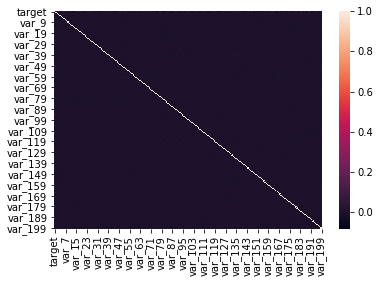

In [10]:
sns.heatmap(train_df_corr)

In [11]:
#It does not look like any of the variables are correlated
upper = train_df_corr.abs().where(np.triu(np.ones(train_df_corr.abs().shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.2
correlated = [column for column in upper.columns if any(upper[column] > 0.2)]

correlated

# no variables are correlated

[]

In [12]:
# there are too many input columns, let's try dimensionality reduction
#1. PCA
#2. Important features using Random forest
#3. PCa using random forest

[ 0.61  1.14  1.67  2.2   2.73  3.26  3.79  4.32  4.85  5.38  5.91  6.43
  6.95  7.47  7.99  8.51  9.03  9.55 10.07 10.59 11.11 11.63 12.15 12.67
 13.19 13.71 14.23 14.75 15.27 15.79 16.31 16.83 17.35 17.87 18.39 18.91
 19.43 19.95 20.47 20.99 21.5  22.01 22.52 23.03 23.54 24.05 24.56 25.07
 25.58 26.09 26.6  27.11 27.62 28.13 28.64 29.15 29.66 30.17 30.68 31.19
 31.7  32.21 32.72 33.23 33.74 34.25 34.76 35.27 35.78 36.29 36.8  37.31
 37.82 38.33 38.84 39.35 39.86 40.37 40.87 41.37 41.87 42.37 42.87 43.37
 43.87 44.37 44.87 45.37 45.87 46.37 46.87 47.37 47.87 48.37 48.87 49.37
 49.87 50.37 50.87 51.37 51.87 52.37 52.87 53.37 53.87 54.37 54.87 55.37
 55.87 56.37 56.87 57.37 57.87 58.37 58.87 59.37 59.87 60.36 60.85 61.34
 61.83 62.32 62.81 63.3  63.79 64.28 64.77 65.26 65.75 66.24 66.73 67.22
 67.71 68.2  68.69 69.18 69.67 70.16 70.65 71.14 71.63 72.12 72.61 73.1
 73.59 74.08 74.57 75.06 75.55 76.04 76.53 77.02 77.51 78.   78.49 78.98
 79.46 79.94 80.42 80.9  81.38 81.86 82.34 82.82 83.

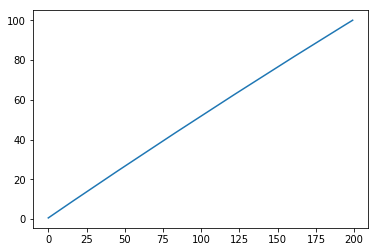

In [13]:
#convert it to numpy arrays
X=train_df.drop(columns=['ID_code','target']).values

#Scaling the values
X = scale(X)

pca = PCA(n_components=200)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)

#pd.DataFrame(pca.components_).round(2).to_csv("xyz.csv")

# now look at heatmap and figure out explainability

### Looks like PCA wont work, there are no features that stand out

# Machine Learning

In [23]:
import lightgbm as lgb
param = {
        'num_leaves': 10,
        'max_bin': 119,
        'min_data_in_leaf': 11,
        'learning_rate': 0.02,
        'min_sum_hessian_in_leaf': 0.00245,
        'bagging_fraction': 1.0, 
        'bagging_freq': 5, 
        'feature_fraction': 0.05,
        'lambda_l1': 4.972,
        'lambda_l2': 2.276,
        'min_gain_to_split': 0.65,
        'max_depth': 14,
        'save_binary': True,
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
    }

## Before we train let's do some cross validation

In [24]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
target = train_df['target']

In [25]:
%%time
import time
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2019)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

start = time.time()


for fold_, (trn_idx, val_idx) in enumerate(skf.split(train_df.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / 5

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

fold n°0
Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.904023	valid_1's auc: 0.885467
[2000]	training's auc: 0.920194	valid_1's auc: 0.894343
[3000]	training's auc: 0.93036	valid_1's auc: 0.898123
[4000]	training's auc: 0.937844	valid_1's auc: 0.899242
Early stopping, best iteration is:
[4536]	training's auc: 0.941474	valid_1's auc: 0.899582
fold n°1
Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.90429	valid_1's auc: 0.881143
[2000]	training's auc: 0.920373	valid_1's auc: 0.890459
[3000]	training's auc: 0.930447	valid_1's auc: 0.894494
[4000]	training's auc: 0.937946	valid_1's auc: 0.896397
[5000]	training's auc: 0.944554	valid_1's auc: 0.89699
Early stopping, best iteration is:
[5103]	training's auc: 0.945216	valid_1's auc: 0.89702
fold n°2
Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.904008	valid_1's auc: 0.886731
[2000]	training's auc: 0.919919	valid_1's auc:

In [26]:
##submission
sub_df = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("lgb_submission.csv", index=False)